In [1]:
import sys
sys.path.append('/global/homes/h/huikong/eboss/LSSanalysis/')
import numpy as np
import astropy.io.fits as fits
from math import sqrt
from optimize import fmin
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages

class linfit:
	def __init__(self,xl,yl,el):
		self.xl = xl
		self.yl = yl
		self.el = el
		
	def chilin(self,bml):
		chi = 0
		b = bml[0]
		m = bml[1]
		for i in range(0,len(self.xl)):
			y = b+m*self.xl[i]
			chi += (self.yl[i]-y)**2./self.el[i]**2.
		return chi	

In [27]:
def plot_exct(inputname,output_plot,titlename,xlab = 'ext'):
    pp = PdfPages(output_plot)
    plt.clf()
    plt.minorticks_on()
    d=np.loadtxt(inputname).transpose()
    chin = sum((d[1]-1.)**2./d[2]**2.)
    print chin
    lf = linfit(d[0],d[1],d[2])
    inl = np.array([1.,0])
    b,m = fmin(lf.chilin,inl)
    print 'b='+str(b)+' m='+str(m)
    chilin = sum((d[1]-(m*d[0]+b))**2./d[2]**2.)
    print chilin
    plt.errorbar(d[0],d[1],d[2],fmt='ko')
    ol = np.ones((len(d[0])))
    plt.plot(d[0],ol,'k:')
    plt.plot(d[0],m*d[0]+b,'k--')
    if xlab == '':
        plt.xlabel(sys,size=16)
    else:
        plt.xlabel(xlab,size=16)

    plt.ylabel(r'$N_{\rm gal}/N_{\rm ran}$ (normalized)',size=16)
    plt.ylim(.7,1.19)
    plt.text(min(d[0])+0.1*(max(d[0])-min(d[0])),1.1,r'$\chi^2$ null ='+str(chin)[:4],color='k')
    plt.text(min(d[0])+0.1*(max(d[0])-min(d[0])),1.08,r'$\chi^2$ lin ='+str(chilin)[:4],color='k')
    #plt.title(r'galaxy density vs. $i$-band depth for v0.7 eboss QSOs, 0.9 < z < 2.2')
    plt.title(titlename)
    pp.savefig()
    plt.show()
    pp.close()
    return True 

188.138702001
Optimization terminated successfully.
         Current function value: 34.444380
         Iterations: 61
         Function evaluations: 117
b=1.0985464645 m=-2.61408694593
34.4443798529


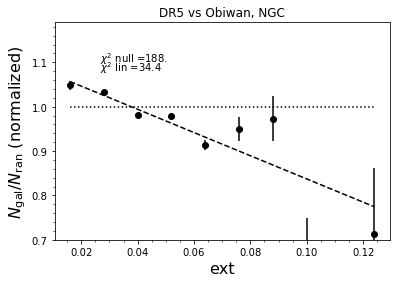

True

In [28]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionNGCDO.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionNGCDO.pdf"
titlename = "DR5 vs Obiwan, NGC"
xlab = 'ext'
plot_exct(inputname,output_plot,titlename,xlab)

956.791196782
Optimization terminated successfully.
         Current function value: 124.895979
         Iterations: 97
         Function evaluations: 191
b=1.20405909307 m=-5.35447590585
124.895978909


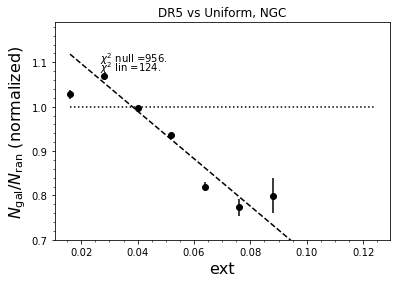

True

In [29]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionNGCDU.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionNGCDU.pdf"
titlename = "DR5 vs Uniform, NGC"
xlab = 'ext'
plot_exct(inputname,output_plot,titlename,xlab)

207.141064479
Optimization terminated successfully.
         Current function value: 28.165040
         Iterations: 61
         Function evaluations: 114
b=1.10191676989 m=-2.6988801594
28.1650398242


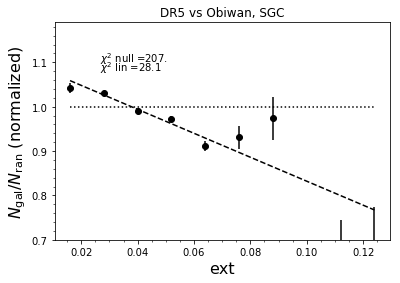

True

In [30]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionSGCDO.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionSGCDO.pdf"
titlename = "DR5 vs Obiwan, SGC"
xlab = 'ext'
plot_exct(inputname,output_plot,titlename,xlab)

982.718315663
Optimization terminated successfully.
         Current function value: 120.669190
         Iterations: 64
         Function evaluations: 124
b=1.20071287062 m=-5.26455971803
120.669190332


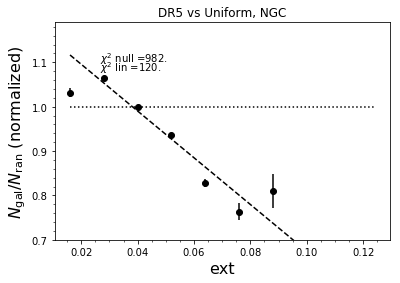

True

In [31]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionSGCDU.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/extinctionSGCDU.pdf"
titlename = "DR5 vs Uniform, NGC"
xlab = 'ext'
plot_exct(inputname,output_plot,titlename,xlab)

159.443026517
Optimization terminated successfully.
         Current function value: 68.459256
         Iterations: 30
         Function evaluations: 55
b=1.09754114058 m=-0.000839377376422
68.4592560981


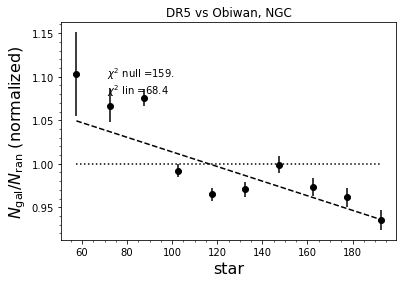

True

In [22]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/starNGCDO.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/starNGCDO.pdf"
titlename = "DR5 vs Obiwan, NGC"
xlab = 'star'
plot_exct(inputname,output_plot,titlename,xlab)

1028.0913054
Optimization terminated successfully.
         Current function value: 102.332754
         Iterations: 32
         Function evaluations: 60
b=1.40994279735 m=-0.00278666283501
102.332753947


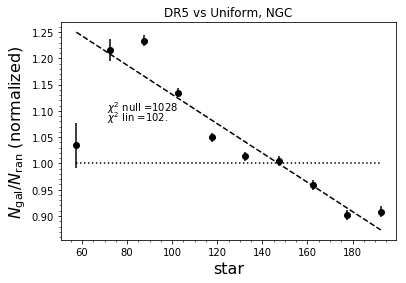

True

In [23]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/starNGCDU.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/starNGCDU.pdf"
titlename = "DR5 vs Uniform, NGC"
xlab = 'star'
plot_exct(inputname,output_plot,titlename,xlab)

171.98955508
Optimization terminated successfully.
         Current function value: 89.051070
         Iterations: 29
         Function evaluations: 54
b=1.08462541576 m=-0.000749003195505
89.051070028


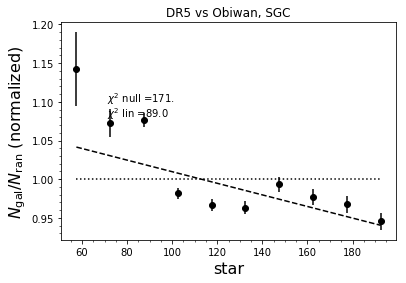

True

In [24]:

inputname="/global/homes/h/huikong/obiwan_test/obiwansys/starSGCDO.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/starSGCDO.pdf"
titlename = "DR5 vs Obiwan, SGC"
xlab = 'star'
plot_exct(inputname,output_plot,titlename,xlab)

1153.97128945
Optimization terminated successfully.
         Current function value: 149.312324
         Iterations: 31
         Function evaluations: 59
b=1.4157303212 m=-0.00285446535447
149.312323731


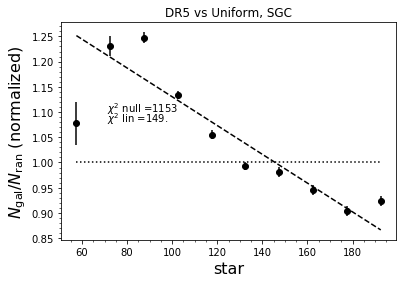

True

In [25]:
inputname="/global/homes/h/huikong/obiwan_test/obiwansys/starSGCDU.dat"
output_plot="/global/homes/h/huikong/obiwan_test/obiwansys/starSGCDU.pdf"
titlename = "DR5 vs Uniform, SGC"
xlab = 'star'
plot_exct(inputname,output_plot,titlename,xlab)